A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Second round of experiments after procedure upgrade.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 0.0
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
Denoise Value set to 0
Flip Horizontal Enable set to 0
Flip Vertical E

In [12]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 185.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.17708109319210052
Exposure set to 0.17708100378513336 (err of 8.57068477577716e-08
Trial 1:
Imaging with Exposure: 0.17708100378513336 s
+Good exposure 0.17708100378513336 Image recieved
Quantile: 4094.0, Target: 3276.0
Exposure current Value: 0.17708100378513336
Exposure Value set to 0.1416994035243988
Exposure set to 0.14169900119304657 (err of 4.0486462243860544e-07
Trial 2:
Imaging with Exposure: 0.14169900119304657 s
+Good exposure 0.14169900119304657 Image recieved
Quantile: 3958.0, Target: 3276.0
Exposure current Value: 0.14169900119304657
Exposure Value set to 0.11728294938802719
Expos

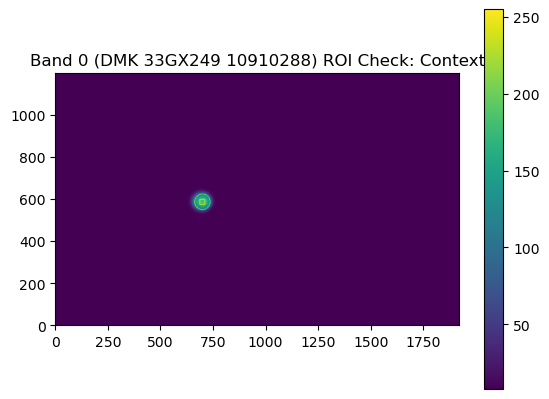

Imaging with Exposure: 0.11554999649524689 s
+Good exposure 0.11554999649524689 Image recieved


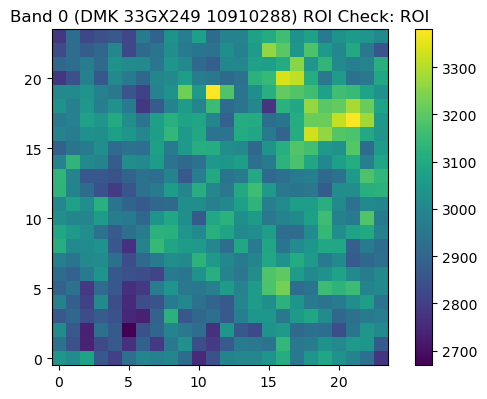

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 166.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.197349414229393
Exposure set to 0.19734899699687958 (err of 4.09967075259976e-07
Trial 1:
Imaging with Exposure: 0.19734899699687958 s
+Good exposure 0.19734899699687958 Image recieved
Quantile: 3585.0, Target: 3276.0
Exposure current Value: 0.19734899699687958
Exposure Value set to 0.1803389936685562
Exposure set to 0.18033799529075623 (err of 1.0044754299720626e-06
Trial 2:
Imaging with Exposure: 0.18033799529075623 s
+Good exposure 0.18033799529075623 Image recieved
Quantile: 3284.0, Target: 3276.0
Exposure current Value: 0.18033799529075623
Exposure Valu

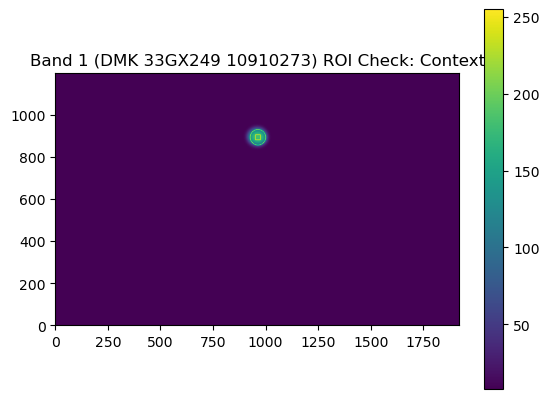

Imaging with Exposure: 0.18017199635505676 s
+Good exposure 0.18017199635505676 Image recieved


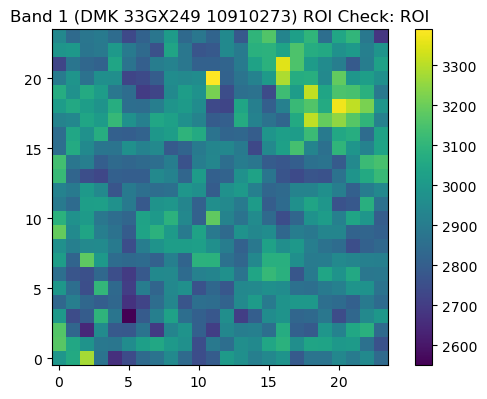

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 139.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.23568347096443176
Exposure set to 0.23568299412727356 (err of 4.7030449987217615e-07
Trial 1:
Imaging with Exposure: 0.23568299412727356 s
+Good exposure 0.23568299412727356 Image recieved
Quantile: 1003.0, Target: 3276.0
Exposure current Value: 0.23568299412727356
Exposure Value set to 0.7697881460189819
Exposure set to 0.7697880268096924 (err of 9.757809249499871e-08
Trial 2:
Imaging with Exposure: 0.7697880268096924 s
+Good exposure 0.7697880268096924 Image recieved
Quantile: 2944.0, Target: 3276.0
Exposure current Value: 0.7697880268096924
Exposure Value

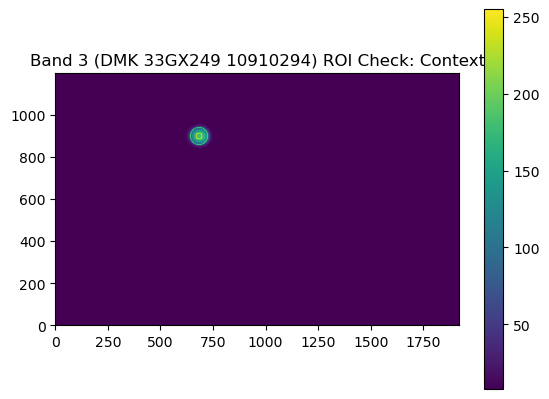

Imaging with Exposure: 0.8623960018157959 s
+Good exposure 0.8623960018157959 Image recieved


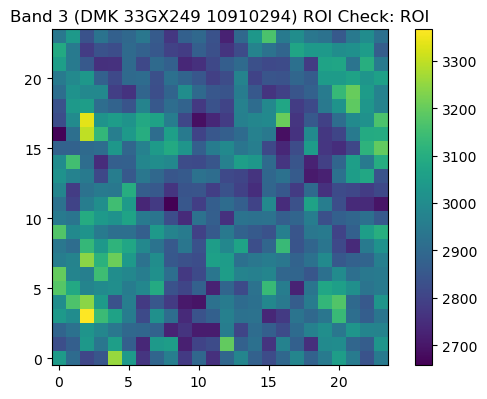

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 192.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.1706250011920929
Exposure set to 0.1706250011920929 (err of 6.912159733474255e-09
Trial 1:
Imaging with Exposure: 0.1706250011920929 s
+Good exposure 0.1706250011920929 Image recieved
Quantile: 4094.0, Target: 3276.0
Exposure current Value: 0.1706250011920929
Exposure Value set to 0.13653334975242615
Exposure set to 0.1365330070257187 (err of 3.3540351832006543e-07
Trial 2:
Imaging with Exposure: 0.1365330070257187 s
+Good exposure 0.1365330070257187 Image recieved
Quantile: 4094.0, Target: 3276.0
Exposure current Value: 0.1365330070257187
Exposure Value set

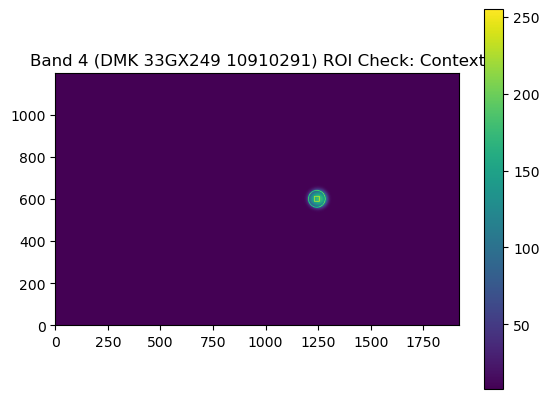

Imaging with Exposure: 0.10049200057983398 s
+Good exposure 0.10049200057983398 Image recieved


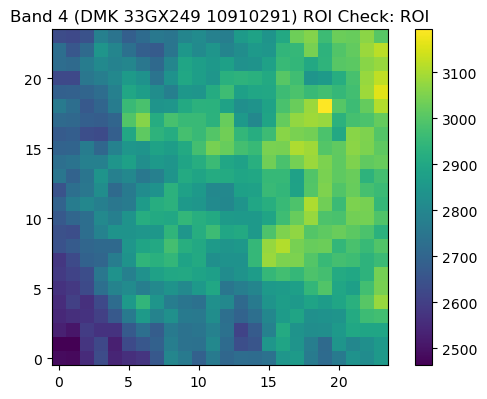

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 155.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.21135485172271729
Exposure set to 0.21135400235652924 (err of 8.463919643209028e-07
Trial 1:
Imaging with Exposure: 0.21135400235652924 s
+Good exposure 0.21135400235652924 Image recieved
Quantile: 2672.0, Target: 3276.0
Exposure current Value: 0.21135400235652924
Exposure Value set to 0.2591301202774048
Exposure set to 0.25913000106811523 (err of 1.3056361747310063e-07
Trial 2:
Imaging with Exposure: 0.25913000106811523 s
+Good exposure 0.25913000106811523 Image recieved
Quantile: 3238.0, Target: 3276.0
Exposure current Value: 0.25913000106811523
Exposure V

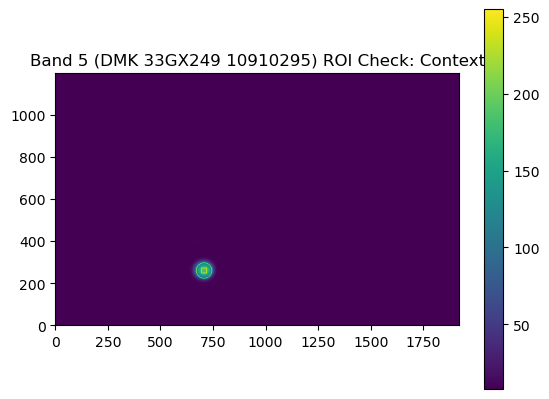

Imaging with Exposure: 0.26329299807548523 s
+Good exposure 0.26329299807548523 Image recieved


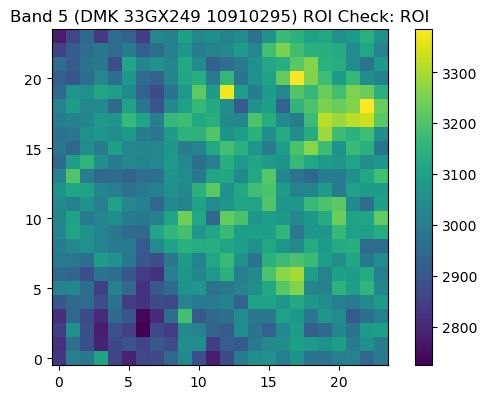

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 137.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.2391241043806076
Exposure set to 0.23912400007247925 (err of 9.887654633944365e-08
Trial 1:
Imaging with Exposure: 0.23912400007247925 s
+Good exposure 0.23912400007247925 Image recieved
Quantile: 788.0, Target: 3276.0
Exposure current Value: 0.23912400007247925
Exposure Value set to 0.9941246509552002
Exposure set to 0.9941239953041077 (err of 6.547434077130987e-07
Trial 2:
Imaging with Exposure: 0.9941239953041077 s
+Good exposure 0.9941239953041077 Image recieved
Quantile: 2838.0, Target: 3276.0
Exposure current Value: 0.9941239953041077
Exposure Value se

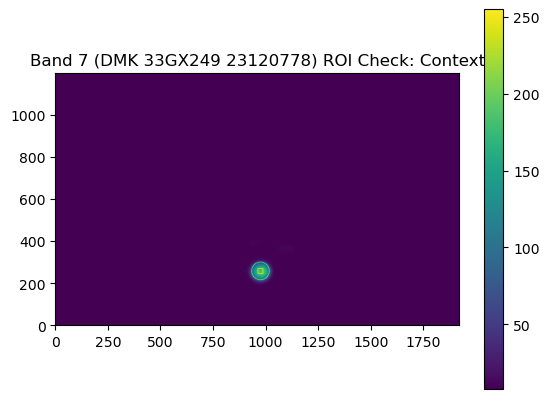

Imaging with Exposure: 1.1528290510177612 s
+Good exposure 1.1528290510177612 Image recieved


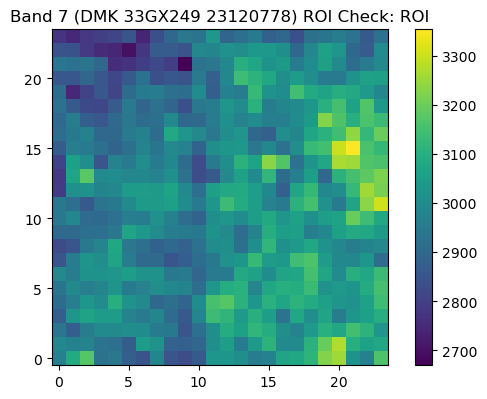

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 259.0, Target: 3276.0
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.12648649513721466
Exposure set to 0.12648600339889526 (err of 4.890953769765005e-07
Trial 1:
Imaging with Exposure: 0.12648600339889526 s
+Good exposure 0.12648600339889526 Image recieved
Quantile: 4094.0, Target: 3276.0
Exposure current Value: 0.12648600339889526
Exposure Value set to 0.10121352225542068
Exposure set to 0.1012130007147789 (err of 5.183704142874834e-07
Trial 2:
Imaging with Exposure: 0.1012130007147789 s
+Good exposure 0.1012130007147789 Image recieved
Quantile: 4094.0, Target: 3276.0
Exposure current Value: 0.1012130007147789
Exposure Value

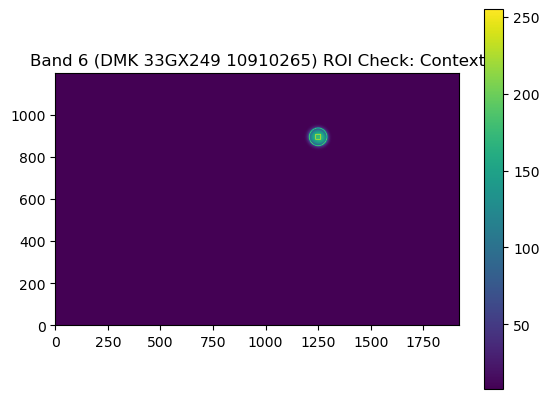

Imaging with Exposure: 0.05071200057864189 s
+Good exposure 0.05071200057864189 Image recieved


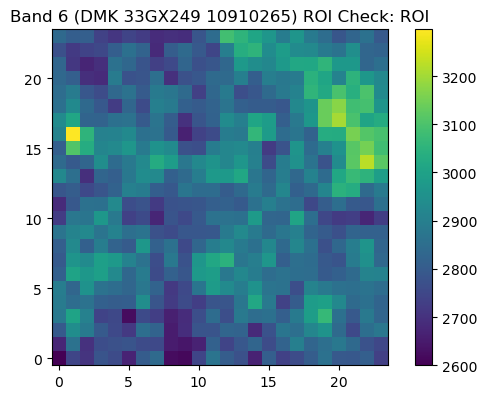

-----------------------------------


In [63]:
osc.find_camera_rois(cameras, roi_size=24)

In [64]:
osc.check_channel_roi_uniformity(cameras)

-----------------------------------
Device 0
-----------------------------------
Imaging with Exposure: 0.11554999649524689 s
+Good exposure 0.11554999649524689 Image recieved
ROI Uniformity: 3.533665649259006 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Imaging with Exposure: 0.18017199635505676 s
+Good exposure 0.18017199635505676 Image recieved
ROI Uniformity: 4.155901755245888 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Imaging with Exposure: 0.8623960018157959 s
+Good exposure 0.8623960018157959 Image recieved
ROI Uniformity: 3.9192287508052845 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Imaging with Exposure: 0.10049200057983398 s
+Good exposure 0.10049200057983398 Image recieved
ROI Uniformity: 4.760545426209643 %
-----------------------------------
---------

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [13]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\0_650\650_72us

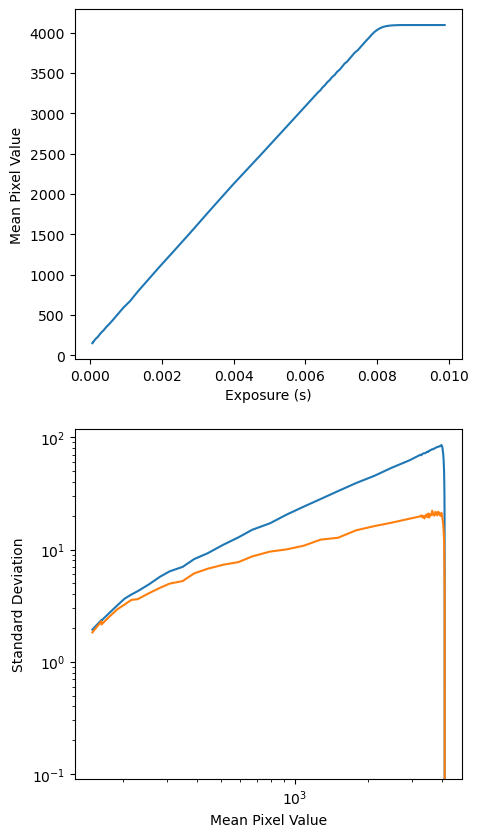

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\1_475\475_72us

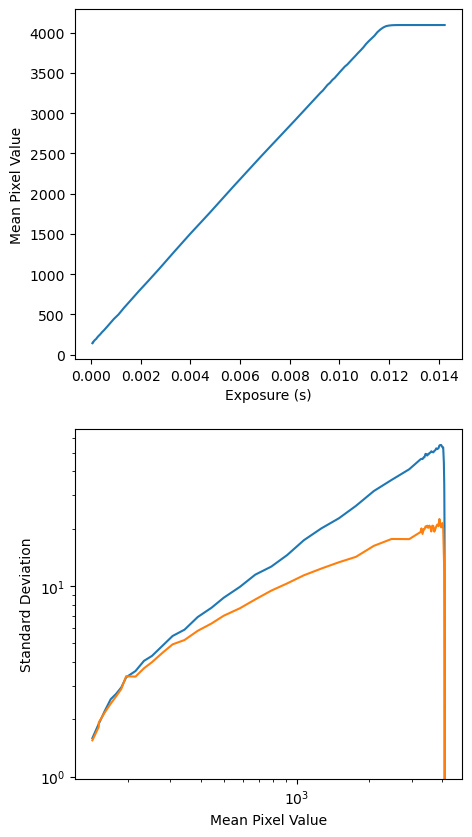

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\3_400\400_72us

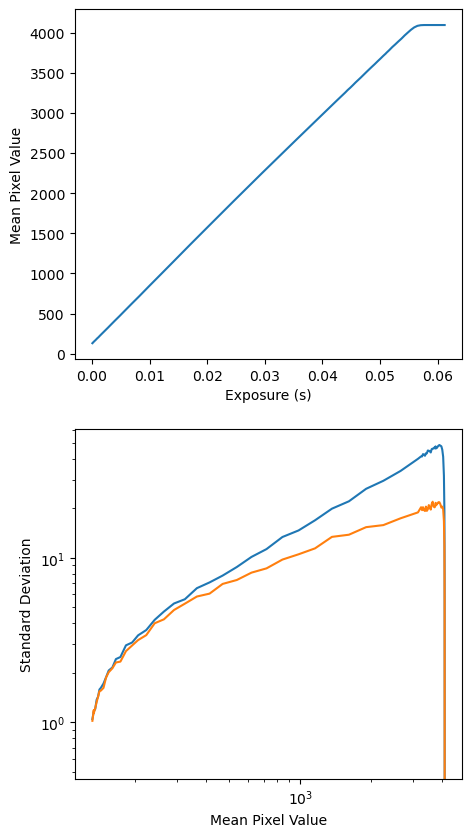

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\4_725\725_72us

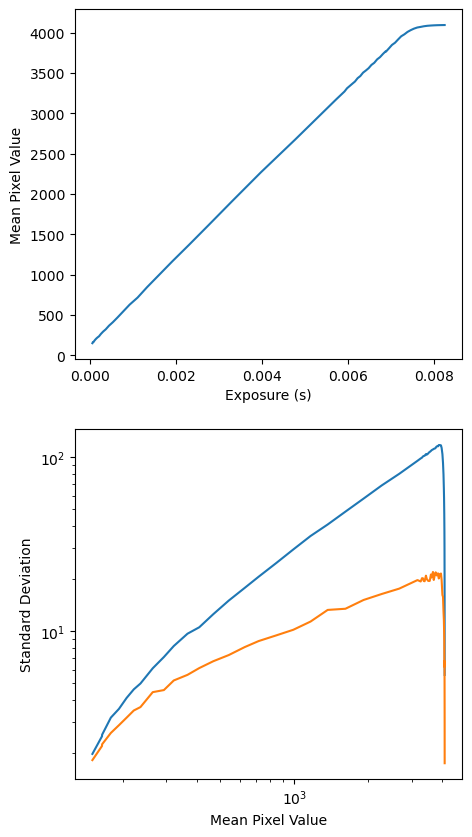

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\5_850\850_72us

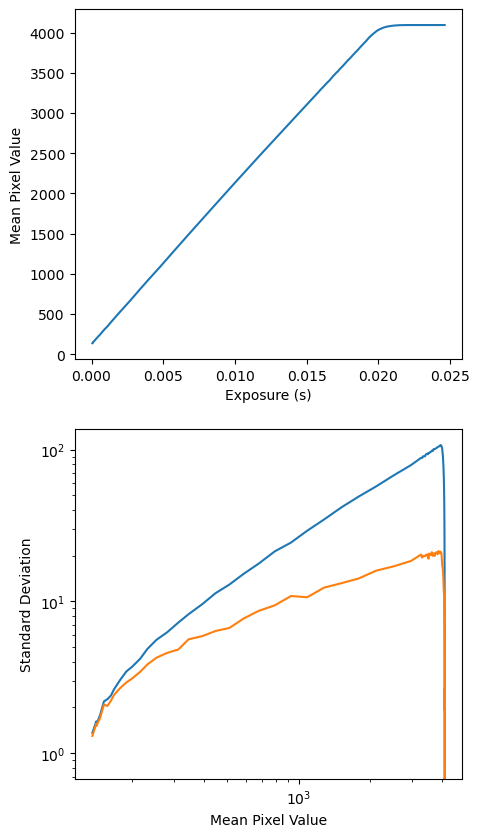

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\7_950\950_72us

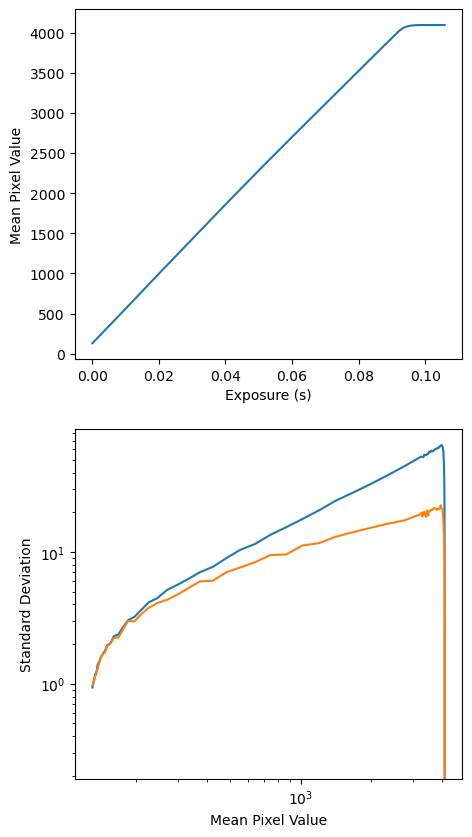

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\6_550\550_72us

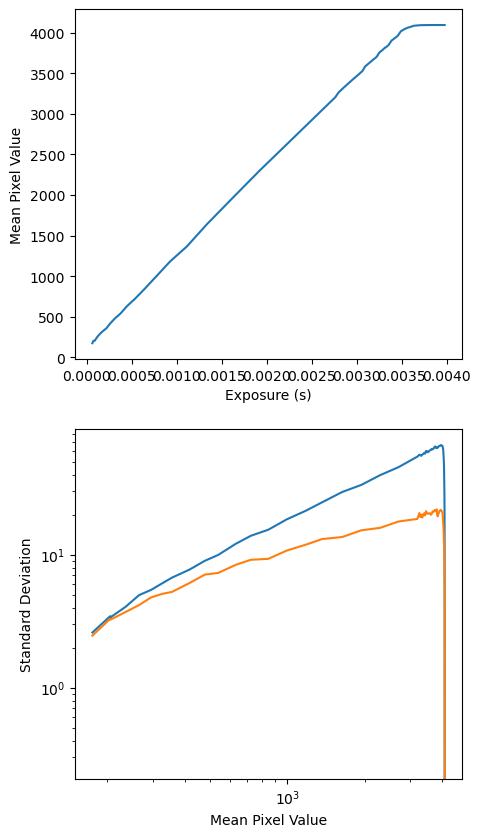

In [62]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\0_650\650_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\0_650\650_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\0_650\650_90us_2_c

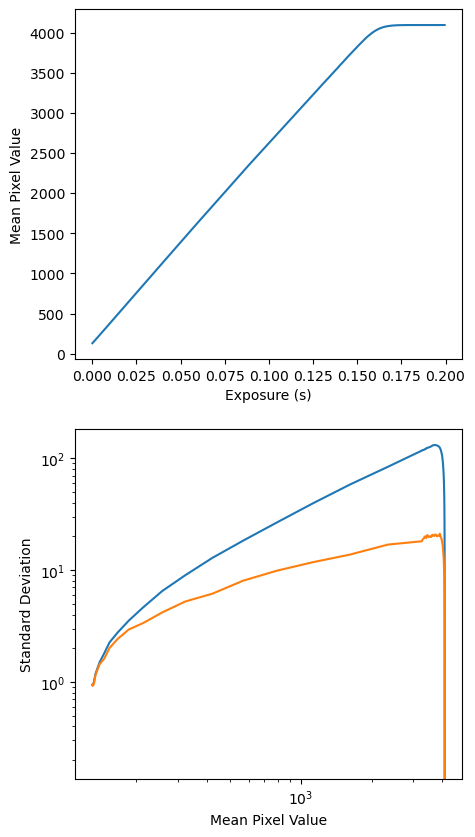

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\1_475\475_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\1_475\475_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\1_475\475_90us_2_c

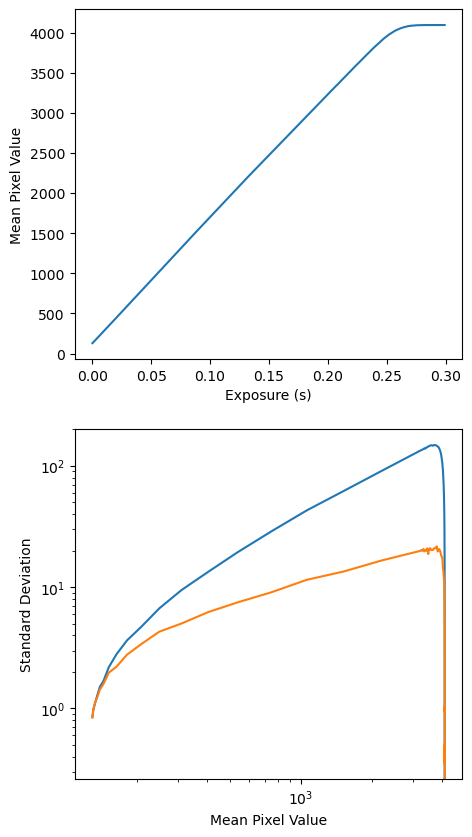

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\3_400\400_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\3_400\400_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\3_400\400_90us_2_c

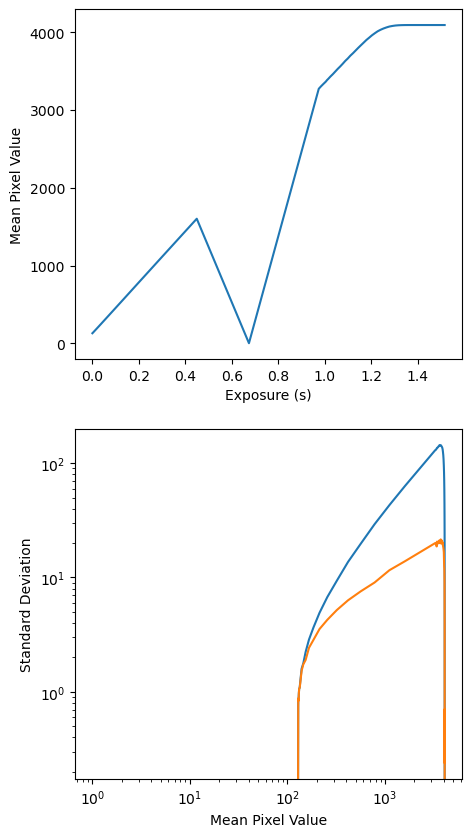

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\4_725\725_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\4_725\725_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\4_725\725_90us_2_c

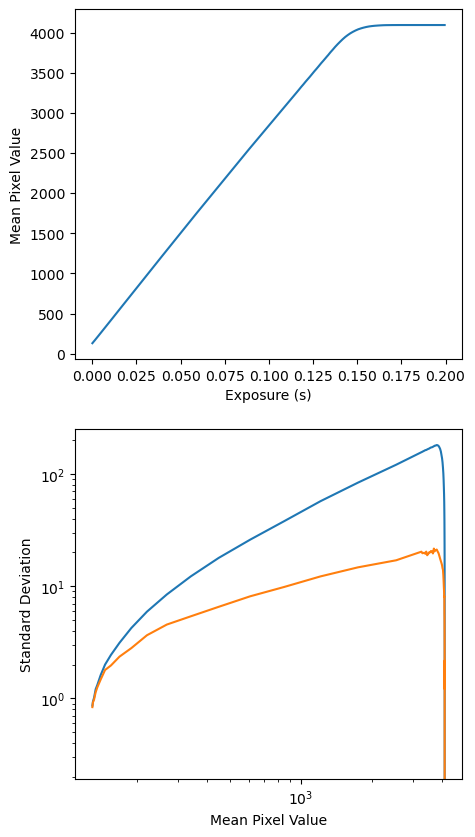

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\5_850\850_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\5_850\850_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\5_850\850_90us_2_c

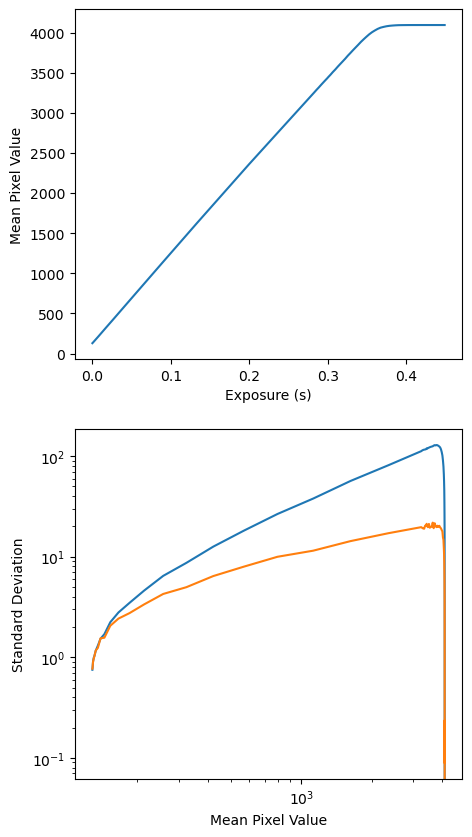

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\7_950\950_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\7_950\950_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\7_950\950_90us_2_c

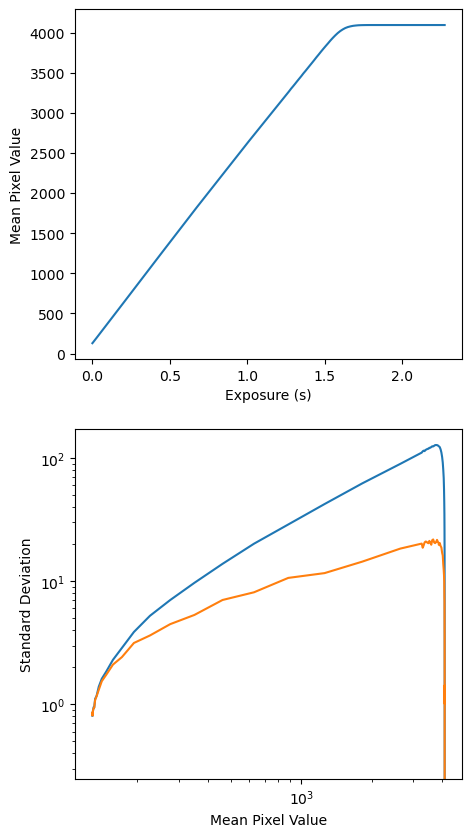

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\6_550\550_60us_2_calibration.tif
Exposure: 0.0000900 s
Exposure Value set to 9.000360296340659e-05
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Imaging with Exposure: 9.000000136438757e-05 s
+Good exposure 9.000000136438757e-05 Image recieved
Exposure current Value: 9.000000136438757e-05
Image 90us_1 written to ..\data\SCT5\6_550\550_90us_1_calibration.tif
Exposure current Value: 9.000000136438757e-05
Image 90us_2 written to ..\data\SCT5\6_550\550_90us_2_c

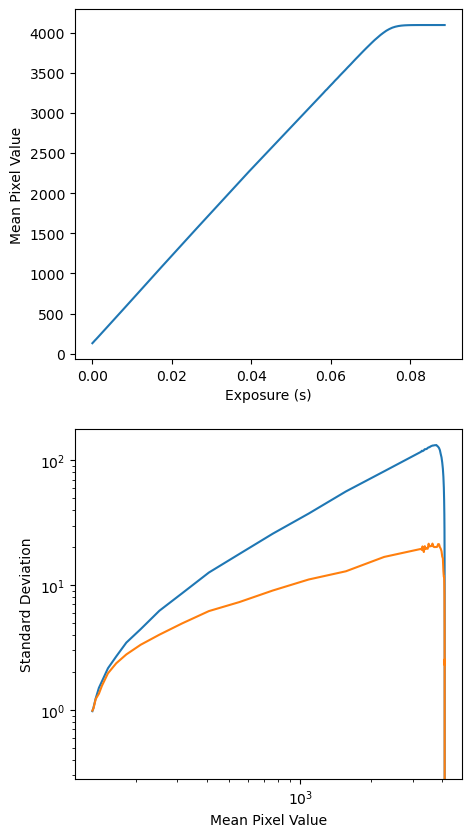

In [67]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\0_650\650_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\0_650\650_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

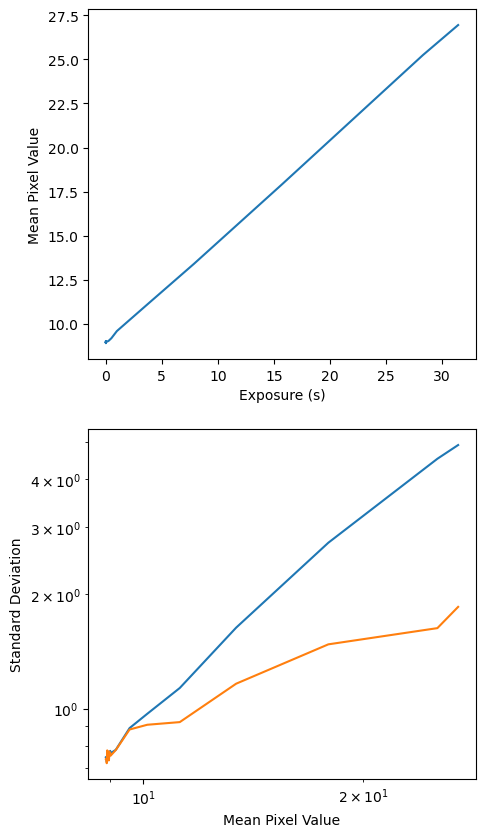

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\1_475\475_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\1_475\475_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

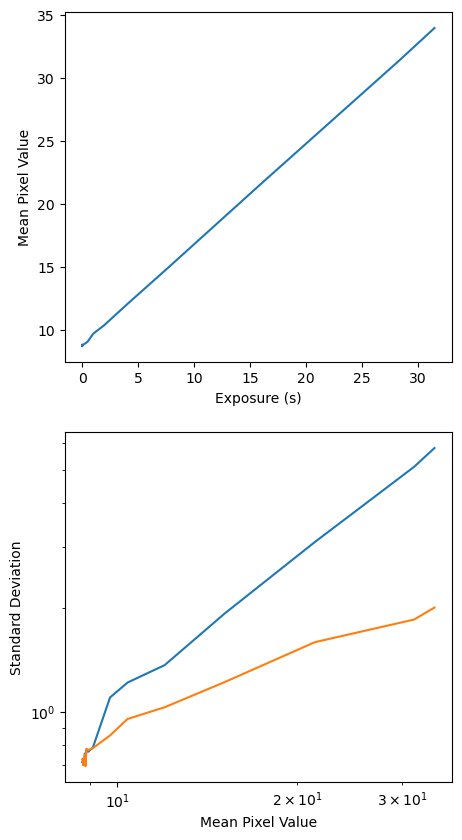

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\3_400\400_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\3_400\400_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

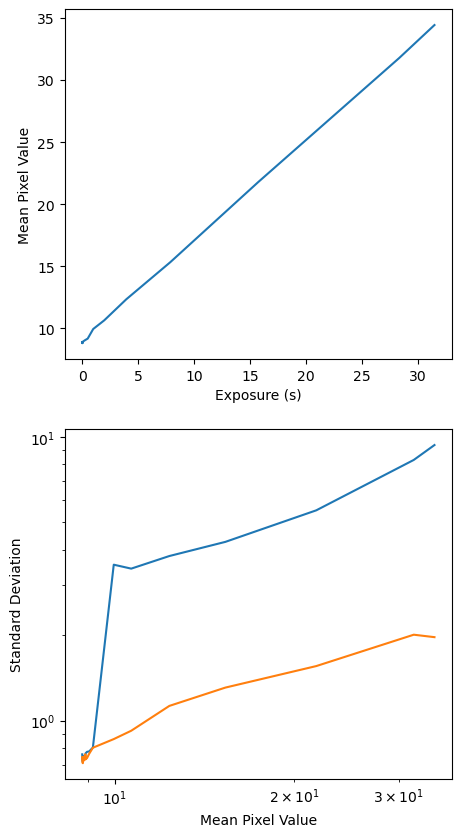

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\4_725\725_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\4_725\725_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

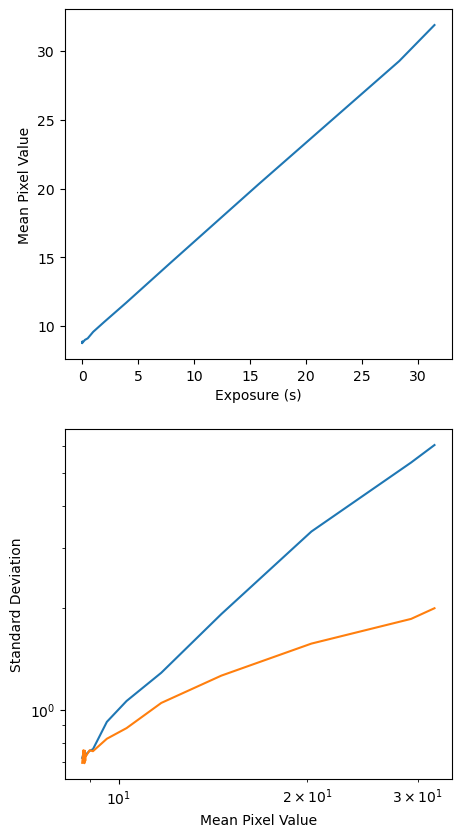

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\5_850\850_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\5_850\850_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

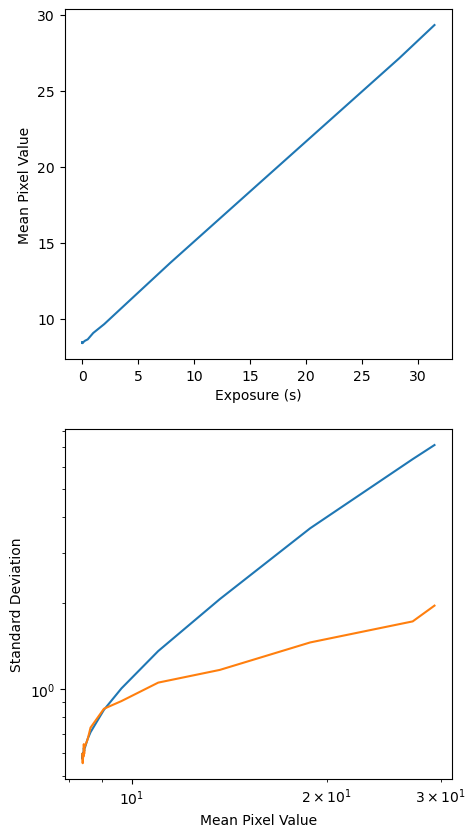

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
-Bad exposure 5.999999848427251e-05 No image recieved in 5000 ms
Imaging with Exposure: 5.999999848427251e-05 s
-Bad exposure 5.999999848427251e-05 No image recieved in 5000 ms
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\7_950\950_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
-Bad exposure 0.00011999999696854502 No image recieved in 5000 ms
Imaging with Exposure: 0.00011999999696854502 s
-Bad exposure 0.00011999999696854502 No image recieved in 5000 ms
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\7_950\950_120us_1_calibration.tif
Exposure current Value: 0.

c:\Users\kameken\Anaconda3\envs\orochi_sim_ctrl\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


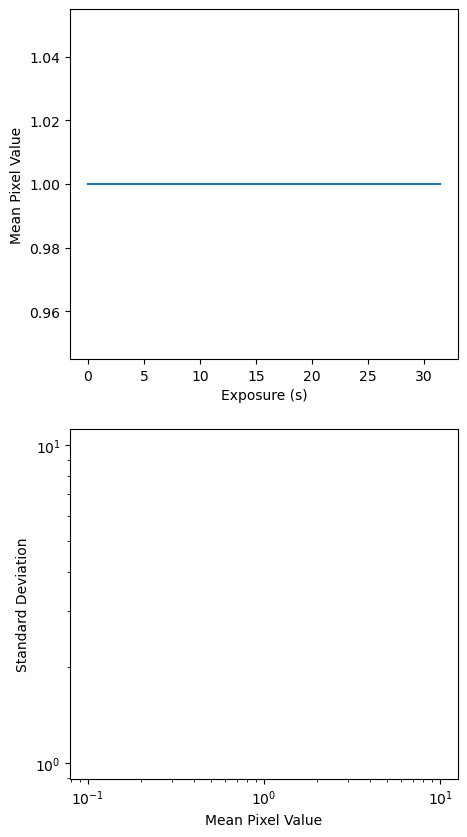

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\dark_48dB\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\dark_48dB\6_550\550_60us_2_calibration.tif
Exposure: 0.0001200 s
Exposure Value set to 0.00012000479910057038
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Imaging with Exposure: 0.00011999999696854502 s
+Good exposure 0.00011999999696854502 Image recieved
Exposure current Value: 0.00011999999696854502
Image 120us_1 written to ..\data\dark_48dB\6_550\550_120us_1_calibration.tif
Exposure current Value: 0.00011999999696854502
Image 120us_2 written to ..\dat

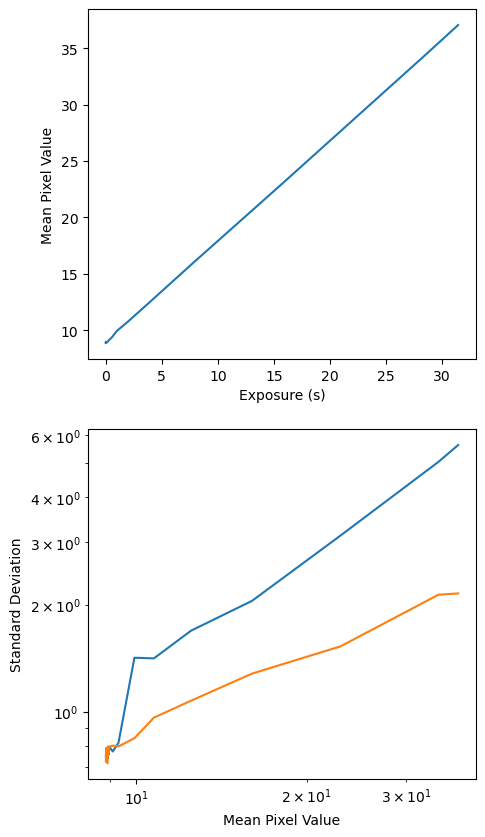

In [14]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_48dB')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [68]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9

In [69]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5', 'drk', drk_ave)

Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.9